In [1]:
#Описание тарифов

#Тариф «Смарт»
#Ежемесячная плата: 550 рублей
#Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
#Стоимость услуг сверх тарифного пакета:
#минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
#сообщение: 3 рубля
#1 Гб интернет-трафика: 200 рублей

#Тариф «Ультра»
#Ежемесячная плата: 1950 рублей
#Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
#Стоимость услуг сверх тарифного пакета:
#минута разговора: 1 рубль
#сообщение: 1 рубль
#1 Гб интернет-трафика: 150 рублей

In [2]:
#Шаг 1. Откройте файл с данными и изучите общую информацию
#Путь к файлам:
#/datasets/calls.csv
#/datasets/internet.csv
#/datasets/messages.csv
#/datasets/tariffs.csv
#/datasets/users.csv

import pandas as pd
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [3]:
print('Проверим все даты на наличае пропусков и несоответствие форматов:')

Проверим все даты на наличае пропусков и несоответствие форматов:


In [4]:
print(calls.info())
print(calls.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000


In [5]:
print(internet.info())
print(internet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB
None
       id  mb_used session_date  user_id
0  1000_0   112.95   2018-11-25     1000
1  1000_1  1052.81   2018-09-07     1000
2  1000_2  1197.26   2018-06-25     1000
3  1000_3   550.27   2018-08-22     1000
4  1000_4   302.56   2018-09-24     1000


In [6]:
print(messages.info())
print(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000


In [7]:
print(tariffs.info())
print(tariffs.head())
tariffs['tariff_name'] = tariffs['tariff_name'].astype('str')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 208.0+ bytes
None
   messages_included  mg_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute tariff_name  
0              550         200                3               3       smart  
1             1950         150                1               1       ultra  


In [8]:
print(users.info())
print(users.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.3+ KB
None
   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   
3     1003   23        NaN       Москва      Белла   Белякова  2018-08-17   
4     1004   68        NaN  Новокузнецк    Татьяна   Авдеенко  2018-05-14   

  tariff  
0  ultra  
1  smart  
2  smart  
3  ultra  
4  ultra  


In [9]:
users['city'] = users['city']
users['first_name'] = users['first_name']
users['last_name'] = users['last_name']
users['tariff'] = users['tariff']

In [10]:
print('Посмотрим данные где указаны длительность звонков и колличество мб за сессию')

Посмотрим данные где указаны длительность звонков и колличество мб за сессию


In [11]:
calls['duration'].hist(bins=100)

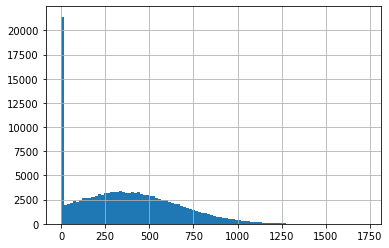

In [12]:
internet['mb_used'].hist(bins=100)

In [13]:
print("""Звонки длительностью 0 минут никак не оплачиваются, поэтому их можно удалить
Аналогично удалим нулевые значения в данных с мегабайтами""")

Звонки длительностью 0 минут никак не оплачиваются, поэтому их можно удалить
Аналогично удалим нулевые значения в данных с мегабайтами


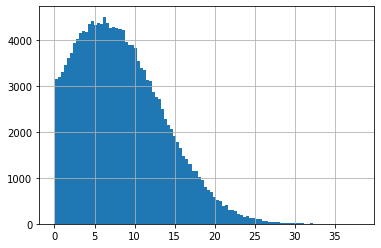

In [14]:
calls = calls.query('duration > 0')
calls['duration'].hist(bins=100)

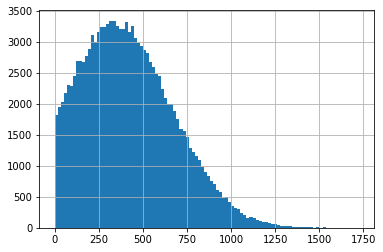

In [15]:
internet = internet.query('mb_used > 0')
internet['mb_used'].hist(bins=100)

In [16]:
print('Красота, все данные впорядке!')

Красота, все данные впорядке!


In [17]:
#Шаг 2. Подготовьте данные
#Посчитайте для каждого пользователя:
#количество сделанных звонков и израсходованных минут разговора по месяцам;
#количество отправленных сообщений по месяцам;
#объем израсходованного интернет-трафика по месяцам;
#помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, 
#сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана).                                           
#Найдите и удалите выбросы. Поясните, по какому принципу вы их искали.

In [18]:
print('Добавим месяца в таблицы calls, masseges, internet')

Добавим месяца в таблицы calls, masseges, internet


In [19]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d %H:%M:%S')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d %H:%M:%S')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d %H:%M:%S')

In [20]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [21]:
print('Посмотрим все ли нормально:')

Посмотрим все ли нормально:


In [22]:
print('Звонки')
print(calls.head())

Звонки
       id  call_date  duration  user_id  month
2  1000_2 2018-06-11      2.85     1000      6
3  1000_3 2018-09-21     13.80     1000      9
4  1000_4 2018-12-15      5.18     1000     12
7  1000_7 2018-08-22     18.31     1000      8
8  1000_8 2018-09-15     18.44     1000      9


In [23]:
print('SMS')
print(messages.head())

SMS
       id message_date  user_id  month
0  1000_0   2018-06-27     1000      6
1  1000_1   2018-10-08     1000     10
2  1000_2   2018-08-04     1000      8
3  1000_3   2018-06-16     1000      6
4  1000_4   2018-12-05     1000     12


In [24]:
print('Интернет')
print(internet.head())

Интернет
       id  mb_used session_date  user_id  month
0  1000_0   112.95   2018-11-25     1000     11
1  1000_1  1052.81   2018-09-07     1000      9
2  1000_2  1197.26   2018-06-25     1000      6
3  1000_3   550.27   2018-08-22     1000      8
4  1000_4   302.56   2018-09-24     1000      9


In [25]:
print('Сгрупируем нужные нам данные по месяцам:')
data_pivot_calls = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
data_pivot_masseges = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc=['count'])
data_pivot_internet = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc=['sum'])
data_pivot_calls.columns = ['calls_sum', 'calls_count']
data_pivot_masseges.columns = ['messages_count']
data_pivot_internet.columns = ['mb_sum']

Сгрупируем нужные нам данные по месяцам:


In [26]:
users_month_pivot = data_pivot_internet.join([data_pivot_masseges, data_pivot_calls])

In [27]:
users_month_pivot['id'] = users_month_pivot.index.get_level_values('user_id')
users_month_pivot['month'] = users_month_pivot.index.get_level_values('month')
users_month_pivot = users_month_pivot.reset_index(drop = True)
users_month_pivot = users_month_pivot.fillna(0)
print('Пропуски в звонках и смс заменим на 0, тк люди ими просто не пользовались')

Пропуски в звонках и смс заменим на 0, тк люди ими просто не пользовались


In [28]:
users.set_axis(['id', 
                'age', 
                'churn_date', 
                'city', 
                'first_name', 
                'last_name', 
                'reg_date', 
                'tariff_name'], 
               axis = 'columns', 
               inplace = True)

In [29]:
users_month_pivot = users_month_pivot.merge(users, on='id')
users_month_pivot = users_month_pivot.merge(tariffs, on='tariff_name')

In [30]:
print('Добавим столбец, где укажем сколько платил пользователь')
import math

def payed(data):
    minuts_over = 0
    gb_over = 0
    message_over = 0
    
    tar_min = data['minutes_included']
    if data['calls_sum'] > tar_min:
        minuts_over = math.ceil(data['calls_sum'] - tar_min)
    
    tar_mess = data['messages_included']
    if data['messages_count'] > tar_mess:
        message_over = math.ceil(data['messages_count'] - tar_mess)
        
    tar_mb = data['mg_per_month_included']
    if data['mb_sum'] > tar_mb:
        gb_over = math.ceil((data['mb_sum'] - tar_mb) / 1024)
        
    summa = (data['rub_monthly_fee'] + 
             minuts_over * data['rub_per_minute'] + 
             message_over * data['rub_per_message'] + 
             gb_over * data['rub_per_gb'])
    
    return summa



users_month_pivot['payed'] = users_month_pivot.apply(payed, axis=1)

Добавим столбец, где укажем сколько платил пользователь


In [31]:
users_month_pivot_ultra = users_month_pivot.query('tariff_name == "ultra"')
users_month_pivot_smart = users_month_pivot.query('tariff_name == "smart"')
print('Разобьем нашу таблицу по такрифам')

Разобьем нашу таблицу по такрифам


In [32]:
print('Посмотрим как люди пользуются тарифом smart')

Посмотрим как люди пользуются тарифом smart


Максимум за месяц человек заплатил 6614


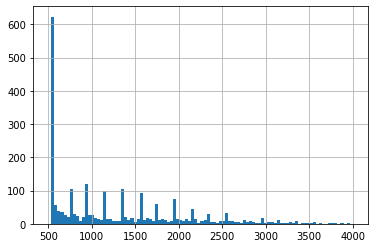

In [33]:
users_month_pivot_smart['payed'].hist(bins=100, range=(500, 4000))
print('Максимум за месяц человек заплатил', users_month_pivot_smart['payed'].max())

In [34]:
print('Cуммы выше 4000 рублей уже крайне редки')
users_month_pivot_smart = users_month_pivot_smart.query('payed <= 4000')

Cуммы выше 4000 рублей уже крайне редки


In [35]:
print('Посмотрим как люди пользуются тарифом ultra')

Посмотрим как люди пользуются тарифом ultra


Максимум за месяц человек заплатил 4800


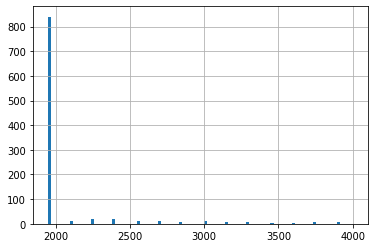

In [36]:
users_month_pivot_ultra['payed'].hist(bins=100, range=(1950, 4000))
print('Максимум за месяц человек заплатил', users_month_pivot_ultra['payed'].max())

In [37]:
print('Cуммы выше 4000 рублей уже крайне редки')
users_month_pivot_ultra = users_month_pivot_ultra.query('payed < 4000')

Cуммы выше 4000 рублей уже крайне редки


In [38]:
#Шаг 3. Проанализируйте данные
#Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём 
#интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное 
#отклонение. Постройте гистограммы. Опишите распределения.

In [39]:
print('Проанализируем клиентов тарифа смарт')

Проанализируем клиентов тарифа смарт


Среднее колличество мб в месяц: 16108.091886024426
Медиана мб в месяц: 16461.940000000002
Дисперсия мб в месяц: 32488678.086936217
Стандартное отклонение мб в месяц: 5699.884041534197
Датасет с отрицательной скошенностью


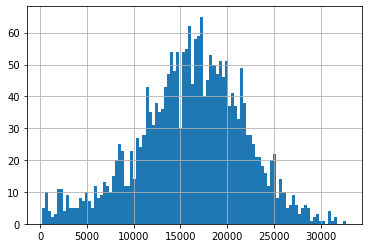

In [40]:
import numpy as np

users_month_pivot_smart['mb_sum'].hist(bins=100)
print('Среднее колличество мб в месяц:', users_month_pivot_smart['mb_sum'].mean())
print('Медиана мб в месяц:', users_month_pivot_smart['mb_sum'].median())
print('Дисперсия мб в месяц:', np.var(users_month_pivot_smart['mb_sum']))
print('Стандартное отклонение мб в месяц:', np.sqrt(np.var(users_month_pivot_smart['mb_sum'])))
print('Датасет с отрицательной скошенностью')

Среднее колличество смс в месяц: 33.36725463591135
Медиана смс в месяц: 28.0
Дисперсия смс в месяц: 789.1866979808419
Стандартное отклонение смс в месяц: 28.09246692586541
Датасет с положительной скошенностью


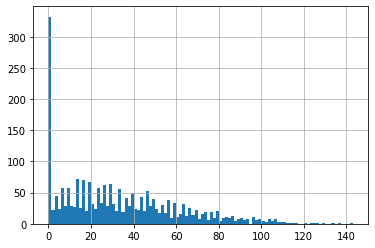

In [41]:
users_month_pivot_smart['messages_count'].hist(bins=100)
print('Среднее колличество смс в месяц:', users_month_pivot_smart['messages_count'].mean())
print('Медиана смс в месяц:', users_month_pivot_smart['messages_count'].median())
print('Дисперсия смс в месяц:', np.var(users_month_pivot_smart['messages_count']))
print('Стандартное отклонение смс в месяц:', np.sqrt(np.var(users_month_pivot_smart['messages_count'])))
print('Датасет с положительной скошенностью')

Среднее колличество минут в месяц: 391.99549072817797
Медиана минут в месяц: 396.3599999999999
Дисперсия минут в месяц: 31158.180294501388
Стандартное отклонение минут в месяц: 176.51679890169487
Датасет с отрицательной скошенностью


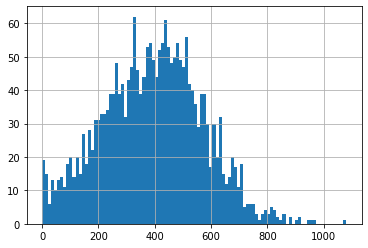

In [42]:
users_month_pivot_smart['calls_sum'].hist(bins=100)
print('Среднее колличество минут в месяц:', users_month_pivot_smart['calls_sum'].mean())
print('Медиана минут в месяц:', users_month_pivot_smart['calls_sum'].median())
print('Дисперсия минут в месяц:', np.var(users_month_pivot_smart['calls_sum']))
print('Стандартное отклонение минут в месяц:', np.sqrt(np.var(users_month_pivot_smart['calls_sum'])))
print('Датасет с отрицательной скошенностью')

Среднее колличество звонков в месяц: 46.66711895070104
Медиана звонков в месяц: 47.0
Дисперсия звонков в месяц: 426.01492516857326
Стандартное отклонение звонков в месяц: 20.64012900077355
Датасет с отрицательной скошенностью


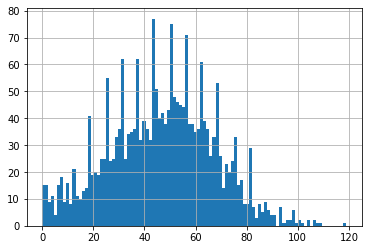

In [43]:
users_month_pivot_smart['calls_count'].hist(bins=100)
print('Среднее колличество звонков в месяц:', users_month_pivot_smart['calls_count'].mean())
print('Медиана звонков в месяц:', users_month_pivot_smart['calls_count'].median())
print('Дисперсия звонков в месяц:', np.var(users_month_pivot_smart['calls_count']))
print('Стандартное отклонение звонков в месяц:', np.sqrt(np.var(users_month_pivot_smart['calls_count'])))
print('Датасет с отрицательной скошенностью')

In [44]:
print('Проанализируем клиентов тарифа ультра')

Проанализируем клиентов тарифа ультра


Среднее колличество мб в месяц: 19576.493072164973
Медиана мб в месяц: 19372.68
Дисперсия мб в месяц: 95787558.02647468
Стандартное отклонение мб в месяц: 9787.111832735676
Датасет с положительной скошенностью


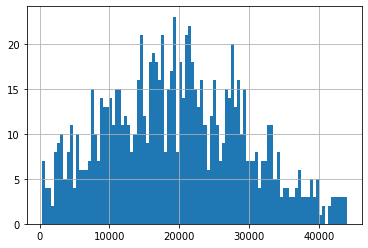

In [45]:
users_month_pivot_ultra['mb_sum'].hist(bins=100)
print('Среднее колличество мб в месяц:', users_month_pivot_ultra['mb_sum'].mean())
print('Медиана мб в месяц:', users_month_pivot_ultra['mb_sum'].median())
print('Дисперсия мб в месяц:', np.var(users_month_pivot_ultra['mb_sum']))
print('Стандартное отклонение мб в месяц:', np.sqrt(np.var(users_month_pivot_ultra['mb_sum'])))
print('Датасет с положительной скошенностью')

Среднее колличество sms в месяц: 49.53814432989691
Медиана sms в месяц: 38.5
Дисперсия sms в месяц: 2283.9021532575152
Стандартное отклонение sms в месяц: 47.79018888074743
Датасет с положительной скошенностью


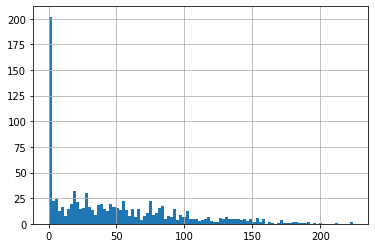

In [46]:
users_month_pivot_ultra['messages_count'].hist(bins=100)
print('Среднее колличество sms в месяц:', users_month_pivot_ultra['messages_count'].mean())
print('Медиана sms в месяц:', users_month_pivot_ultra['messages_count'].median())
print('Дисперсия sms в месяц:', np.var(users_month_pivot_ultra['messages_count']))
print('Стандартное отклонение sms в месяц:', np.sqrt(np.var(users_month_pivot_ultra['messages_count'])))
print('Датасет с положительной скошенностью')

Среднее колличество минут в месяц: 499.9673402061864
Медиана минут в месяц: 491.40000000000003
Дисперсия минут в месяц: 89614.1324943686
Стандартное отклонение минут в месяц: 299.3561966861027
Датасет с положительной скошенностью


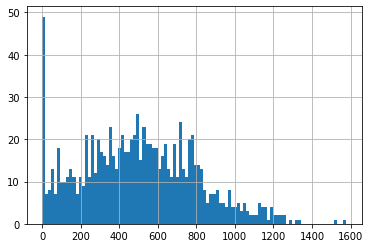

In [47]:
users_month_pivot_ultra['calls_sum'].hist(bins=100)
print('Среднее колличество минут в месяц:', users_month_pivot_ultra['calls_sum'].mean())
print('Медиана минут в месяц:', users_month_pivot_ultra['calls_sum'].median())
print('Дисперсия минут в месяц:', np.var(users_month_pivot_ultra['calls_sum']))
print('Стандартное отклонение минут в месяц:', np.sqrt(np.var(users_month_pivot_ultra['calls_sum'])))
print('Датасет с положительной скошенностью')

Среднее колличество звонков в месяц: 59.57113402061856
Медиана звонков в месяц: 59.0
Дисперсия звонков в месяц: 1262.2696822191504
Стандартное отклонение звонков в месяц: 35.5284348405492
Датасет с положительной скошенностью


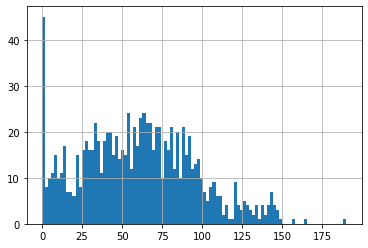

In [48]:
users_month_pivot_ultra['calls_count'].hist(bins=100)
print('Среднее колличество звонков в месяц:', users_month_pivot_ultra['calls_count'].mean())
print('Медиана звонков в месяц:', users_month_pivot_ultra['calls_count'].median())
print('Дисперсия звонков в месяц:', np.var(users_month_pivot_ultra['calls_count']))
print('Стандартное отклонение звонков в месяц:', np.sqrt(np.var(users_month_pivot_ultra['calls_count'])))
print('Датасет с положительной скошенностью')

In [49]:
print("""Для тарифа смарт кроме СМС все датасеты с отрицательной скошенностью
Для тарифа ультра все датасеты с положительной скошенностью

Из этого следует что люди которые берут смарт стараются выжать из тарифа максимум(что не касается СМС, тк есть месенжеры),
Люди берущие тариф ультра напротив редко используют все ресурсы своего тарифа по СМС и минутам

По этой причине люди, пользующиеся тарифом смарт, часто берут пакеты минут и ГБ сверх тарифа, в отличае от владельцев тарифа
ультра, котрые в редких ситуациях прибегают к этому""")

Для тарифа смарт кроме СМС все датасеты с отрицательной скошенностью
Для тарифа ультра все датасеты с положительной скошенностью

Из этого следует что люди которые берут смарт стараются выжать из тарифа максимум(что не касается СМС, тк есть месенжеры),
Люди берущие тариф ультра напротив редко используют все ресурсы своего тарифа по СМС и минутам

По этой причине люди, пользующиеся тарифом смарт, часто берут пакеты минут и ГБ сверх тарифа, в отличае от владельцев тарифа
ультра, котрые в редких ситуациях прибегают к этому


In [50]:
#Шаг 4. Проверьте гипотезы
#средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
#средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;
#Пороговое значение alpha задайте самостоятельно.
#Поясните:
#как вы формулировали нулевую и альтернативную гипотезы;
#какой критерий использовали для проверки гипотез и почему.

In [51]:
print('Проверим гипотизу что средняя сумма денег которую тратят люди на смарт и на ультра равны')

Проверим гипотизу что средняя сумма денег которую тратят люди на смарт и на ультра равны


In [52]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(
    users_month_pivot_ultra['payed'], 
    users_month_pivot_smart['payed'],
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.5192709135077795e-208
Отвергаем нулевую гипотезу


In [53]:
print('Все таки люди, которые пользуются тарифом ультра переплачивают за услуги')

Все таки люди, которые пользуются тарифом ультра переплачивают за услуги


In [54]:
print("Проверим гипотизу что средняя сумма денег которую тратят люди в Москве и за ее пределами равны")

Проверим гипотизу что средняя сумма денег которую тратят люди в Москве и за ее пределами равны


In [55]:
users_moscow = users_month_pivot.query('city == "Москва"')
users_not_moscow = users_month_pivot.query('city != "Москва"')

In [56]:
alpha = 0.05

results = st.ttest_ind(
    users_moscow['payed'], 
    users_not_moscow['payed'],
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.46410213271701706
Не получилось отвергнуть нулевую гипотезу


In [57]:
print('На самом деле без разницы откуда человек, в среднем все платят одинаково')

На самом деле без разницы откуда человек, в среднем все платят одинаково


In [58]:
#Шаг 5. Напишите общий вывод
print("""Люди которые берут смарт стараются выжать из тарифа максимум(что не касается СМС, тк есть месенжеры),
Люди берущие тариф ультра напротив редко используют все ресурсы своего тарифа по СМС и минутам

По этой причине люди, пользующиеся тарифом смарт, часто берут пакеты минут и ГБ сверх тарифа, в отличае от владельцев тарифа
ультра, котрые в редких ситуациях прибегают к этому

Люди, которые пользуются тарифом ультра переплачивают за услуги, тк не используют их полностью

Без разницы откуда из Москвы или из другого города человек, в среднем все платят одинаково""")

Люди которые берут смарт стараются выжать из тарифа максимум(что не касается СМС, тк есть месенжеры),
Люди берущие тариф ультра напротив редко используют все ресурсы своего тарифа по СМС и минутам

По этой причине люди, пользующиеся тарифом смарт, часто берут пакеты минут и ГБ сверх тарифа, в отличае от владельцев тарифа
ультра, котрые в редких ситуациях прибегают к этому

Люди, которые пользуются тарифом ультра переплачивают за услуги, тк не используют их полностью

Без разницы откуда из Москвы или из другого города человек, в среднем все платят одинаково


In [59]:
#Описание данных

#Таблица users (информация о пользователях):
#user_id — уникальный идентификатор пользователя
#first_name — имя пользователя
#last_name — фамилия пользователя
#age — возраст пользователя (годы)
#reg_date — дата подключения тарифа (день, месяц, год)
#churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
#city — город проживания пользователя
#tarif — название тарифного плана

#Таблица calls (информация о звонках):
#id — уникальный номер звонка
#call_date — дата звонка
#duration — длительность звонка в минутах
#user_id — идентификатор пользователя, сделавшего звонок

#Таблица messages (информация о сообщениях):
#id — уникальный номер сообщения
#message_date — дата сообщения
#user_id — идентификатор пользователя, отправившего сообщение

#Таблица internet (информация об интернет-сессиях):
#id — уникальный номер сессии
#mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
#session_date — дата интернет-сессии
#user_id — идентификатор пользователя

#Таблица tariffs (информация о тарифах):
#tariff_name — название тарифа
#rub_monthly_fee — ежемесячная абонентская плата в рублях
#minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
#messages_included — количество сообщений в месяц, включённых в абонентскую плату
#mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
#rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
#rub_per_message — стоимость отправки сообщения сверх тарифного пакета
#rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)